# **Hospital Length of Stay (LOS) Prediction**

## **Context:**

Hospital management is a vital area that gained a lot of attention during the COVID-19 pandemic. **Inefficient distribution of resources like beds, ventilators might lead to a lot of complications**. However, this can be mitigated by **predicting the length of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the LOS and increase the chances of recovery. The rooms and bed can also be planned in accordance with that.

**HealthPlus hospital has been incurring a lot of losses in revenue and life due to its inefficient management system.** They have been unsuccessful in allocating pieces of equipment, beds, and hospital staff fairly. **A system that could estimate the length of stay (LOS) of a patient can solve this problem to a great extent.**

## **Objective:**

As a Data Scientist, you have been hired by HealthPlus to analyze the data, find out **what factors affect the LOS the most, and come up with a machine learning model which can predict the LOS of a patient** using the data available during admission and after running a few tests. Also, **bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.**

## **Data Dictionary:**

The data contains various information recorded during the time of admission of the patient. It only contains **records of patients who were admitted to the hospital.** The detailed data dictionary is given below:


* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable**
* **Available Extra Rooms in Hospital**: The number of rooms available during admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward

## **Approach to solve the problem:**

1. Import the necessary libraries
2. Read the dataset and get an overview
3. Exploratory data analysis - a. Univariate b. Bivariate
4. Data preprocessing if any
5. Define the performance metric and build ML models
6. Checking for assumptions
7. Compare models and determine the best one
8. Observations and business insights

## **Import Libraries**

In [2]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# To Build model for prediction
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn import tree

# To Build model with statsmodels: 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# To check model performance
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

#To encode categorical data 
from sklearn.preprocessing import LabelEncoder

# Importing Sequential Feature Selector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Ensemble models
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [3]:
health_df = pd.read_csv('healthcare_data.csv')
health_df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [4]:
health_df.shape

(500000, 15)

In [5]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  500000 non-null  object 
 11  Visitors with Patient              5000

- The dataset includes 500k data points and total of 15 columns. 
- Stay is target here. 
- There are 6 numerical variables and 9 catgorical variables in the data.
- Non-null means that no missing data is here. 

In [6]:
health_df.duplicated().sum()

0

- No dublicate data exist in this dataset.

In [7]:
health_df.patientid.value_counts()

126719    21
125695    21
44572     21
126623    21
125625    19
          ..
37634      1
91436      1
118936     1
52366      1
105506     1
Name: patientid, Length: 126399, dtype: int64

- Notice that some we have patients that admitted to hospital several times. the number of admission time can be a good value to save in seperate column but it seems that right now the author didn't care about it and we can drop that. 

In [8]:
health_df.drop(columns='patientid', inplace=True)

- No duplicate data point exists in this data and no data is missing.

In [9]:
health_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,NaN,NaN,NaN,3.6388,2.698124,0.0,2.0,3.0,4.0,24.0
Department,500000,5,gynecology,343478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ward_Facility_Code,500000,6,F,120538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doctor_name,500000,9,Dr Sarah,99596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
staff_available,500000.0,NaN,NaN,NaN,5.02047,3.158103,0.0,2.0,5.0,8.0,10.0
Age,500000,10,21-30,159793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,500000,3,Female,370810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type of Admission,500000,3,Trauma,310536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Severity of Illness,500000,3,Moderate,280197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
health_conditions,500000,6,None,151888,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- On average 3 rooms is avaibale in the hospital. Sometimes that hospital is full and we have zero beds and sometimes it has max 24 beds aviables. 50% of times 2 to 4 beds are avaialble. 
- On average 5 staff are aviabale in the hospital. due this number changes from 0 to 10 staff. 50% of times 2 to 8 dysff str available in this hospital. 
- On average there are 3 visitors with the patient in the hospital. This number can get to max of 32 and min of 0. 50% of time there are 2 to 4 visitors with patients. 
- On average admission deposite is ~$4700 with min of ~$1650 and max of ~$10104
- On average patient stays 12 days in the hospital with min of 3 days and max of 51 days. 50% of patient stayed between 8 to 11 days. The median of stay is 9 days. 

In [10]:
cat_var = ['Department', 'Ward_Facility_Code', 'gender', 'Type of Admission', 'health_conditions', 'doctor_name', 'Age', 'Insurance', 'Severity of Illness']

for i in cat_var[:4]:
    print(health_df[i].value_counts(1))
    print('--'*50)


gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: Department, dtype: float64
----------------------------------------------------------------------------------------------------
F    0.241076
D    0.238110
B    0.207770
E    0.190748
A    0.093102
C    0.029194
Name: Ward_Facility_Code, dtype: float64
----------------------------------------------------------------------------------------------------
Female    0.74162
Male      0.20696
Other     0.05142
Name: gender, dtype: float64
----------------------------------------------------------------------------------------------------
Trauma       0.621072
Emergency    0.271568
Urgent       0.107360
Name: Type of Admission, dtype: float64
----------------------------------------------------------------------------------------------------


In [11]:
for i in cat_var[4:6]:
    print(health_df[i].value_counts(1))
    print('--'*50)

None                   0.303776
Other                  0.188822
High Blood Pressure    0.158804
Diabetes               0.147288
Asthama                0.131028
Heart disease          0.070282
Name: health_conditions, dtype: float64
----------------------------------------------------------------------------------------------------
Dr Sarah     0.199192
Dr Olivia    0.196704
Dr Sophia    0.149506
Dr Nathan    0.141554
Dr Sam       0.111422
Dr John      0.102526
Dr Mark      0.088820
Dr Isaac     0.006718
Dr Simon     0.003558
Name: doctor_name, dtype: float64
----------------------------------------------------------------------------------------------------


In [12]:
for i in cat_var[6:]:
    print(health_df[i].value_counts(1))
    print('--'*50)

21-30     0.319586
31-40     0.266746
41-50     0.160812
11-20     0.093072
61-70     0.053112
51-60     0.043436
71-80     0.037406
81-90     0.016362
0-10      0.006736
91-100    0.002732
Name: Age, dtype: float64
----------------------------------------------------------------------------------------------------
Yes    0.78592
No     0.21408
Name: Insurance, dtype: float64
----------------------------------------------------------------------------------------------------
Moderate    0.560394
Minor       0.263074
Extreme     0.176532
Name: Severity of Illness, dtype: float64
----------------------------------------------------------------------------------------------------


- 68% of the pateints are admited in the gynecology department, ~16% in radiotherapy, ~8.8% anesthesia, 4.5% TB and chest disease and 1% surgery.
- 74% of the patients are women and 20% are men 5% of patient are in other category. 
- 62% of are Trauma, 27% emergancy and 10% are urgent care patients. 
- 26% of patients are in minor condition, 56% in moderate and 17% in extreme conditions. 
- 79% of patients have insurance while 21% deosn't have isurance. 
- ~32% of the patients are in their 20s, 26.6% in 30s, 16% in 40's and the rest of from other ages. 
- 16% of patients have high blood pressure, 15% have diabetes, 13% have asthama, 7% have heart disease and 19% have other diseases while 30% have no cronich diseases.

## **Exploratory Data Analysis**

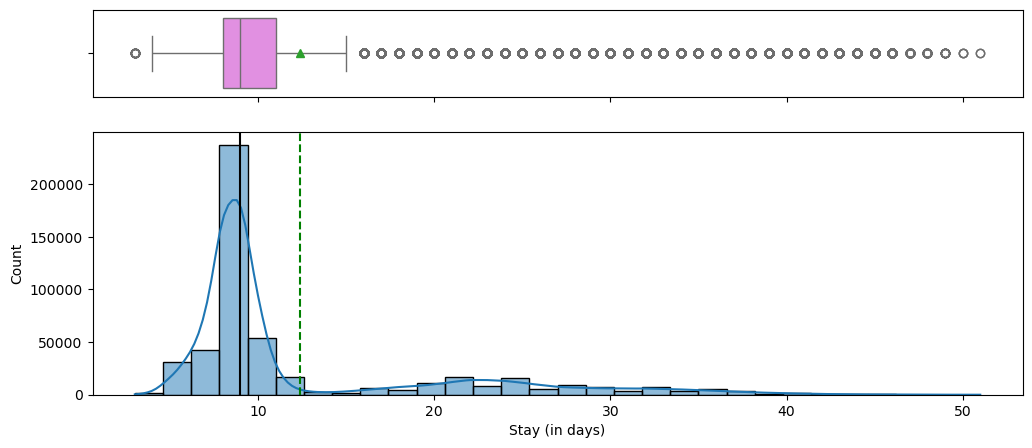

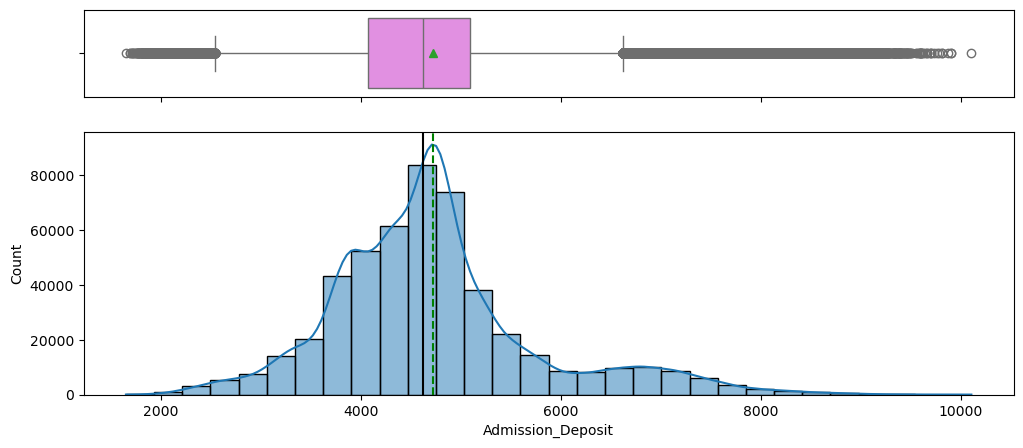

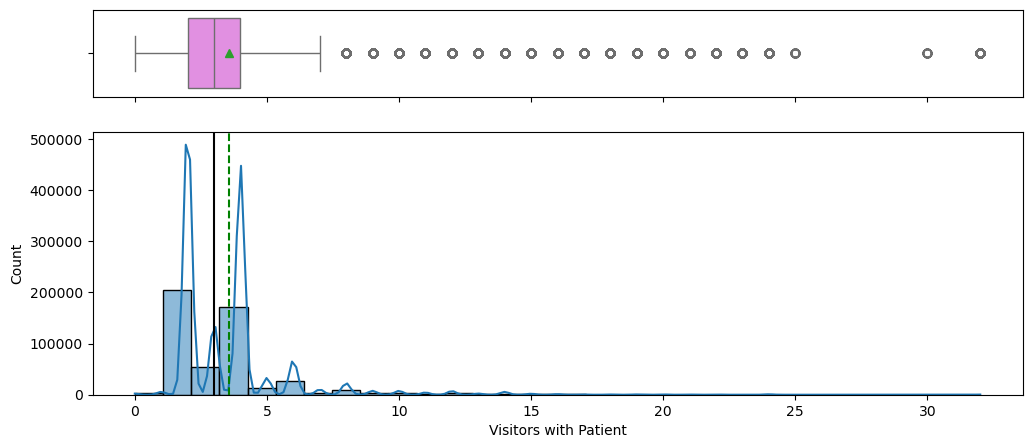

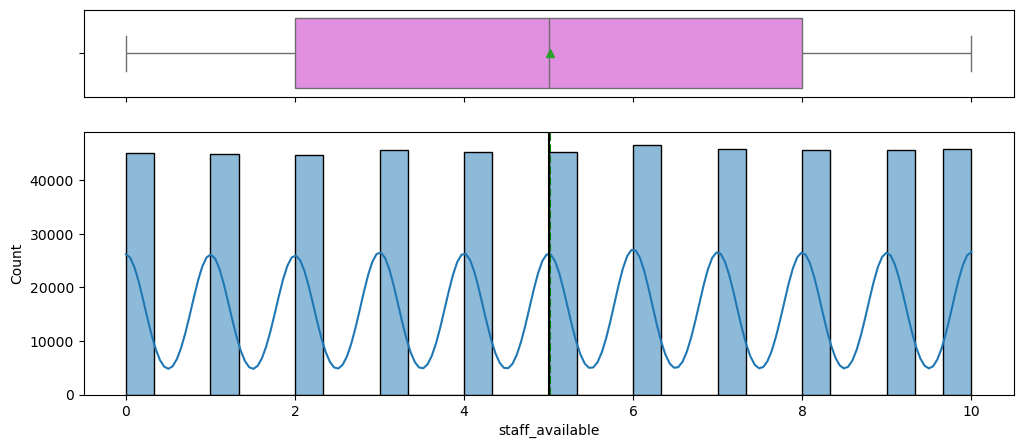

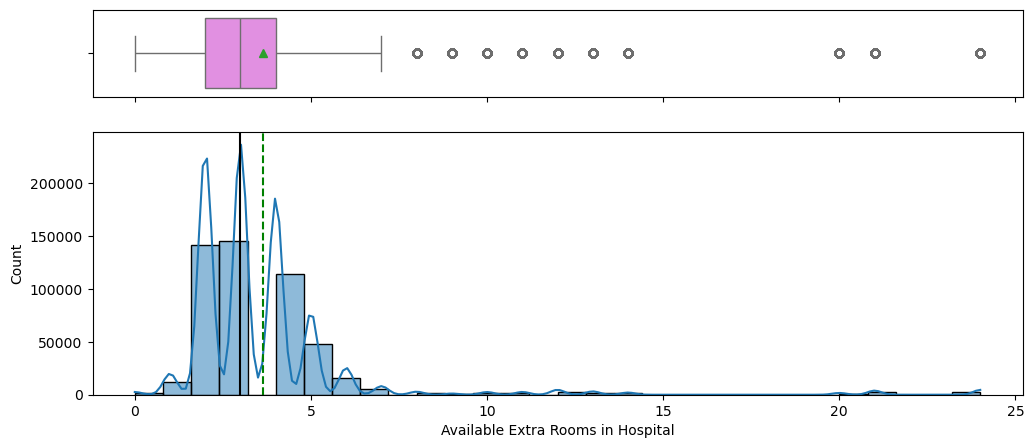

In [13]:
col_num = ['Stay (in days)', 'Admission_Deposit', 'Visitors with Patient', 'staff_available', 'Available Extra Rooms in Hospital']

for col in col_num:
    f, (ax_box, ax_hist) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = (12,5),
    )                   # Creating the 2 subplots
    sns.boxplot(data=health_df, x=col, ax = ax_box, showmeans = True, color='violet')
    sns.histplot(data=health_df, x=col, kde=True, ax=ax_hist, bins=30, palette='winter'
                 )
    ax_hist.axvline(health_df[col].mean(), color='green', linestyle = '--')
    ax_hist.axvline(health_df[col].median(), color='black', linestyle = '-')
    plt.show()

- **Days stay in hospital:**
    - Most of the patients stayed 8 r 9 days in the hospital.
    - few patients stay more than 10 days and even fewer more than 40 days. 
    - This might be due to the fact that most of the patients are minor or moderately ill. 
    - The results are right skewed. 

- **Admission Deposite:**
    - This is close to normal distribution on average patients paied ~$4700 however they are patients that paid nothing and patients that paid ~10k.

- **Visitors of Patients:**
    - 50% of patients had 2 to 4 visitors. This is a bimodal distribution which is highly right skewed. 

- **Number of avilable staff**
    - it is uniform distribution with 0 to 10 staff available. 

- **Avilable Hospital Rooms:**
    - it is highly right skewed data points. 
    - Most of the time the hospital has between 2 to 4 beds availble.  

<Axes: >

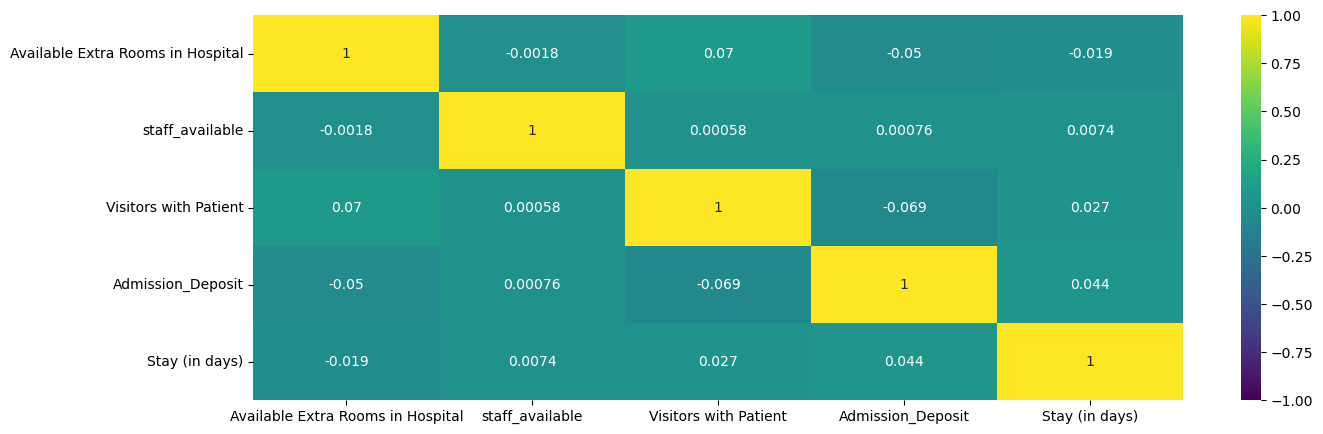

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(data=health_df.select_dtypes(exclude = ['object']).corr(), annot=True, cmap = 'viridis'
            , vmin=-1, vmax=1)

- The data show no strong correlation between the variables. 
- The numberical variables show no correlation with the number of stays in the hospital which can indicate the importance of the categroical variables. 

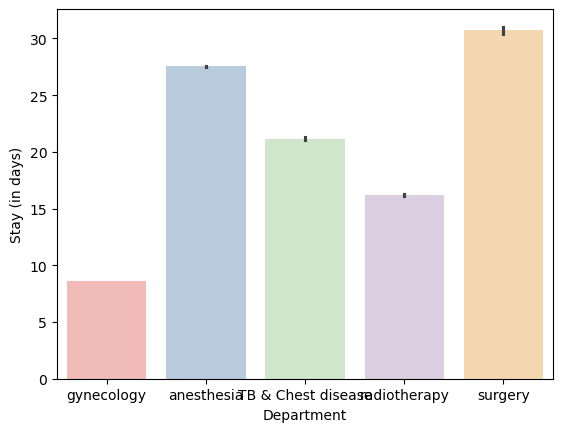

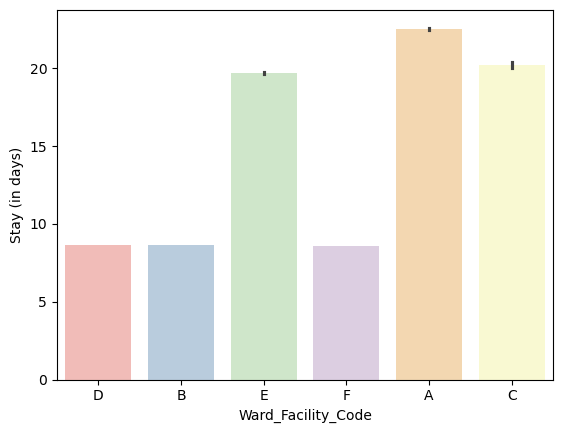

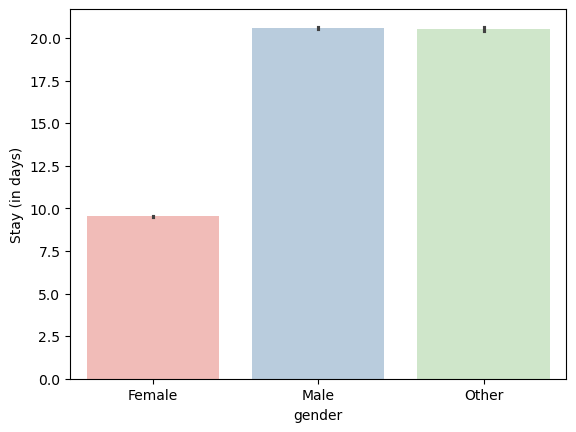

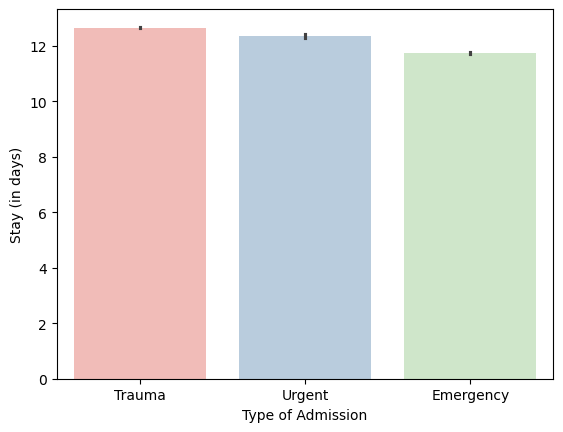

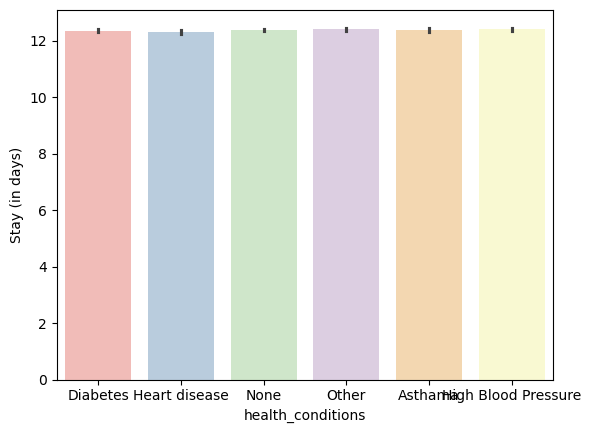

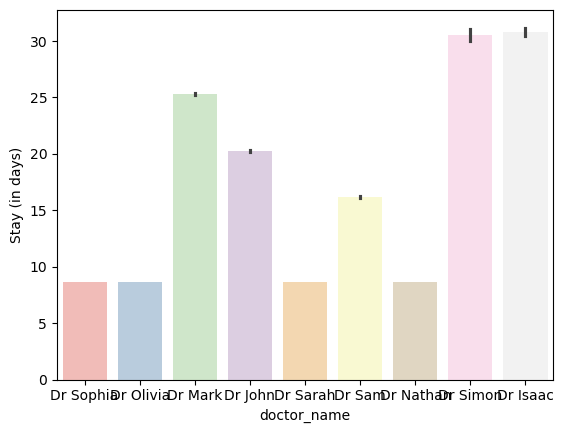

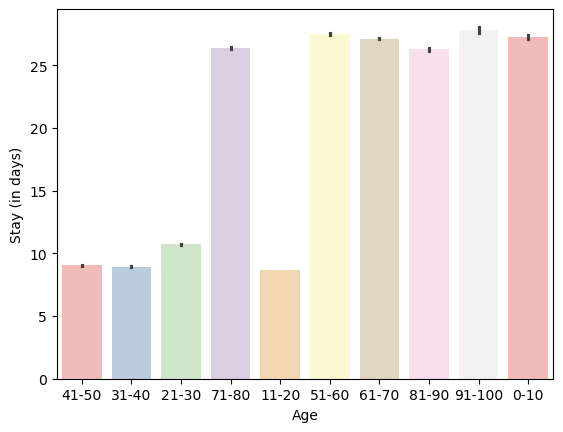

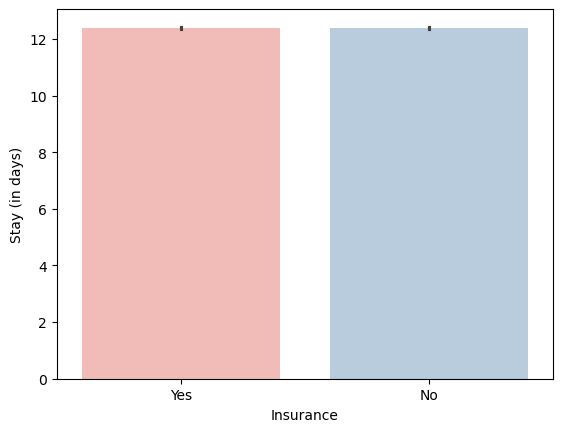

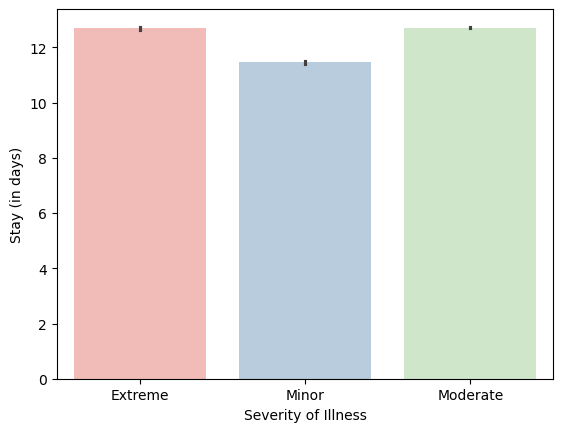

In [15]:
col_cat = ['Department', 'Ward_Facility_Code', 'gender', 'Type of Admission', 'health_conditions', 'doctor_name', 'Age', 'Insurance', 'Severity of Illness']
target = 'Stay (in days)'

for col in col_cat:
    sns.barplot(data=health_df, x=col, y='Stay (in days)', palette='Pastel1')
    # sns.histplot(data=health_df, x=col, kde=True, ax=ax_hist, bins=30, palette='winter'
    #              )
    # ax_hist.axvline(health_df[col].mean(), color='green', linestyle = '--')
    # ax_hist.axvline(health_df[col].median(), color='black', linestyle = '-')
    plt.show()

- Patients age between 0-10 and 51-100 stay longer in the hospital. 
- Having insurance or not didn't really affact the length of stay in the hospital. 
- The severity of illness didn't impace the length of stay in the hospital. 
- Patient of certian dr's stayed in the hospital longer. 
- pre- existing health condistion didn't effect the length of stay in the hospital. 
- Women stay shorter amount in the hosptial then men.
- The ward facility code has a relation with the amount of stay in the hospital. 
- Department has a relation with the number of days stay in the hospital. The surgary department stay longer than the gynecology. 


<Axes: xlabel='Ward_Facility_Code', ylabel='Stay (in days)'>

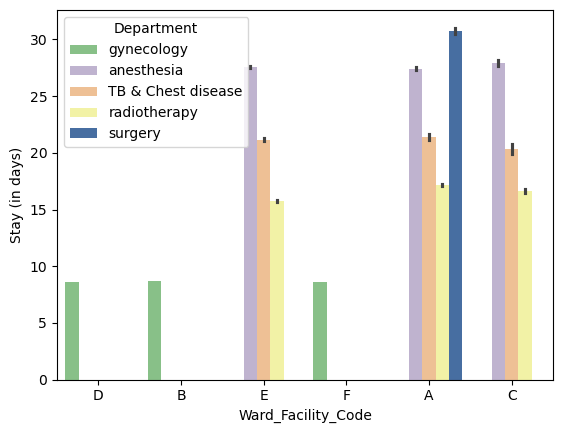

In [16]:
sns.barplot(data=health_df, x='Ward_Facility_Code', y='Stay (in days)', hue='Department', palette='Accent')

- The B, D and F ward has least number of days in the hospital since all of their patients are gynecology department which typically means minor procedure. 
- A,C, and E ward have patients from surgery. anesthesia, TB and chest and radiotherapy which are usully dealing with more serious disease. 

<Axes: xlabel='Ward_Facility_Code', ylabel='Stay (in days)'>

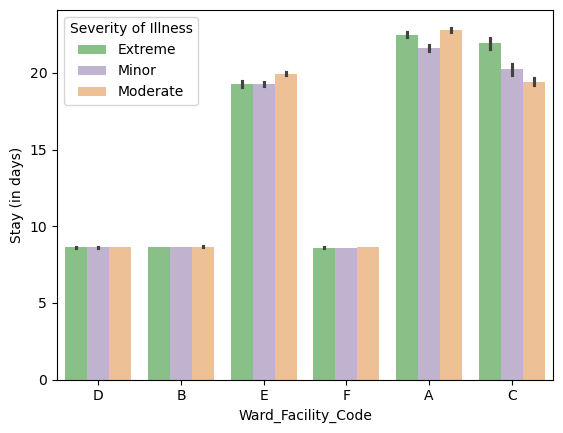

In [17]:
sns.barplot(data=health_df, x='Ward_Facility_Code', y='Stay (in days)', hue='Severity of Illness', palette='Accent')

- Ward A and C has the highest number of sever cases so it makes sense that patients there stay longer. 
- More staff probablily needed for A, C and E department. 

## **Data preparation for Building Model**

- Need to encode the categorical variables for the study

In [18]:
health_df = pd.get_dummies(
    health_df,
    columns= health_df.select_dtypes(include=["object", "category"]).columns.tolist(), 
    drop_first=True  )
health_df

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,...,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
0,4,0,4,2966.408696,8,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,4,2,2,3554.835677,9,0,1,0,0,1,...,1,0,1,0,0,1,0,0,0,0
2,2,8,2,5624.733654,7,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3,4,7,4,4814.149231,8,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,2,10,2,5169.269637,34,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,2,3,4105.795901,10,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
499996,13,8,2,4631.550257,11,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
499997,2,3,2,5456.930075,8,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
499998,2,1,2,4694.127772,23,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [19]:
x= health_df.drop('Stay (in days)', axis=1)
y = health_df['Stay (in days)']


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True, random_state=1)

In [21]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (400000, 42)
Shape of test set :  (100000, 42)


## **Building Models**

In [22]:
# functions to calculate different variables. 
def adj_r2_score(predictor, target, prediction):
    r2 = r2_score(target, prediction)
    n = predictor.shape[0]
    k = predictor.shape[1]
    return 1 - (((1 - r2) * (n - 1))/(n - k - 1))

# mean absolute precentage error MAPE:
def mape_score(target, prediction):
    return np.mean(np.abs(target-prediction)/target) * 100

# function to check all the preformances: 
def preformance_regression(model, predictor, target):
    prediction = model.predict(predictor) 
    r2 = r2_score(target, prediction) # compute R-Squared
    adj_r2 = adj_r2_score(predictor, target, prediction) #compute adjusted R-Squared
    rmse = np.sqrt (mean_squared_error(target,prediction)) #Compute RMSE
    mae = mean_absolute_error(target, prediction) # compute Mean absolute error
    mape = mape_score(target, prediction) # mean absolute precentage error

    pref_df = pd.DataFrame(
        {"R-Squared": r2,
         "Adj. R-Squared": adj_r2,
         "RMSE": rmse, 
         "MAE": mae,
         "MAPE": mape
         },
         index = [0]
    )

    return pref_df




- I can use scikitlearn or statsmodel for this perpuse. Scikit learn is more for traditional ML and predictor building and cross validation while statsmodel is more to build best most with good paramateres and expain the effect of each parameter on the performance of the structure. 


In [23]:


# statsmodel doesn't add the constant by defualt. 
x_train1 = sm.add_constant(x_train)
x_test1 = sm.add_constant(x_test)

ols_mdeol1 = sm.OLS(y_train, x_train1).fit()

ols_mdeol1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 5.643e+04
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:43:02   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399961   BIC:                         2.050e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.8918      0.055    359.659      0.000      19.783      20.000
Available Extra Rooms in Hospital         0.0786      0.002     42.311      0.000       0.075       0.082
staff_available                          -0.0009      0.002     -0.588      0.557      -0.004       0.002
Visitors with Patient                     0.0002      0.002      0.099      0.921      -0.004       0.005
Admission_Deposit                     -3.839e-05   4.78e-06     -8.029      0.000   -4.78e-05    -2.9e-05
Department_anesthesia                     6.0823      0.029    210.110      0.000       6.026       6.139
Department_gynecology                     0.4635      0.019     24.149      0.000       0.426       0.501
Department_radiotherapy                  -4.6217      0.037   -126.135      0.000      -4.693      -4.550
Department_surgery                        9.6867      0.044    218.475      0.000       9.600       9.774
Ward_Facility_Code_B                      0.2571      0.011     23.468      0.000       0.236       0.279
Ward_Facility_Code_C                      0.4349      0.035     12.604      0.000       0.367       0.503
Ward_Facility_Code_D                      0.2033      0.011     19.313      0.000       0.183       0.224
Ward_Facility_Code_E                      0.3087      0.021     14.409      0.000       0.267       0.351
Ward_Facility_Code_F                      0.0031      0.011      0.282      0.778      -0.018       0.025
doctor_name_Dr John                       7.2631      0.031    232.919      0.000       7.202       7.324
doctor_name_Dr Mark                       1.1949      0.033     36.394      0.000       1.131       1.259
doctor_name_Dr Nathan                    -0.2164      0.017    -12.662      0.000      -0.250      -0.183
doctor_name_Dr Olivia                    -0.3620      0.016    -22.985      0.000      -0.393      -0.331
doctor_name_Dr Sam                        1.2836      0.038     33.875      0.000       1.209       1.358
doctor_name_Dr Sarah                      0.8252      0.020     41.740      0.000       0.786       0.864
doctor_name_Dr Simon                      6.1602      0.069     89.051      0.000       6.025       6.296
doctor_name_Dr Sophia                     0.2167      0.020     10.605      0.000       0.177       0.257
Age_11-20                               -12.7378      0.065   -194.584      0.000     -12.866     -12.609
Age_21-30                               -10.4830      0.062   -168.463      0.000     -10.605     -10.361
Age_31-40                               -13.4354      0.062   -216.955      0.000     -13.557     -13.314
Age_41-50                               -13.5113      0.062   -216.833      0.000     -13.633     -13.389
Age_51-60

In [24]:
print(ols_mdeol1.summary())

                            OLS Regression Results                            
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 5.643e+04
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:43:02   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399961   BIC:                         2.050e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [25]:
print('preformance of test data:')
preformance_regression(ols_mdeol1, x_test1, y_test)

preformance of test data:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.84303,0.842962,3.144036,2.155759,19.676874


In [26]:
print('preformance of training data:')
preformance_regression(ols_mdeol1, x_train1, y_train)

preformance of training data:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.842813,0.842796,3.135092,2.14624,19.591781


- `R-squared` is 0.84 both on  test and training data. 
- Some of the features such as the number of visitor of a patient the confidence interval doesn' rejaect the hypothesis that the parameter relate to it is zero. 
- In other word there are vairables that are not statistically enough to predict the outcome. 
- Whereever the P-value here became above 0.05 aren't significant enough. 
- P-value here is basically probablility that the coef is zero (hypothesis of coef is zero). 
- base on this # of staff available also is not significant enough variable to effect the Days of stay. 

- The fact that the RMSE in the test adn training data are very close to each other it indicates that we are not overfitting. 
- The Mean absolute error (MSE) can tell that the current model can predict patients with mean error of 2.15 days. 
- The Mean precentage error is 19% on the test data. 


#### **Check Multicolinearity**

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def check_vif(train): 
    vif = pd.DataFrame()
    vif['Feature'] = train.columns
    vif['VIF'] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif


In [28]:
check_vif(x_train1)

,Feature,VIF
0,const,0.000000
1,Available Extra Rooms in Hospital,1.023190
2,staff_available,1.001928
3,Visitors with Patient,1.029237
4,Admission_Deposit,1.021088
5,Department_anesthesia,2.737559
6,Department_gynecology,inf
7,Department_radiotherapy,7.650821
8,Department_surgery,inf
9,Ward_Facility_Code_B,inf


- For numerical column that has VIF higher than 5 we need to drop them due to multicolinearity. 
- The numerical columns were: 'Admission_Deposit', 'Visitors with Patient', 'staff_available', 'Available Extra Rooms in Hospital' which for all of them the VIF is less than 2. So all of these are going to stay. 
- We shouldn't use VIF for categorical features that converted to numerical values through dummies. 

#### **Dropping Features and create reg. model**

- As mentioned above we don't need to drop any feature due to multicolieanrity. 
- However we notice in the previous model that the p_value was higher than 0.05 for some of the numerical features. Meaning that they are not statistically significant and we should drop them. 
- These features are: staff_available, Visitors with Patient. 
- For categorical features, if that features has k categories, it will create k-1 dummies for them. We can remove the dumies for that feature only if all the k-1 dummies were insignificant and has p>0.05 otherwise even if one was less that 0.05 you need to keep all the dummies. 
- In here Insurance had two categories and the one dummy feature has p~0.374 so we can remove insurance feature as well. 

In [29]:
x_train2 = x_train1.drop(['Insurance_Yes','staff_available','Visitors with Patient'], axis=1)
x_test2 = x_test1.drop(['Insurance_Yes','staff_available','Visitors with Patient'], axis=1)

ols_model2 = sm.OLS(y_train, x_train2).fit()

ols_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 6.127e+04
Date:                Fri, 29 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:43:43   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399964   BIC:                         2.050e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.8830      0.054    367.192      0.000      19.777      19.989
Available Extra Rooms in Hospital         0.0786      0.002     42.392      0.000       0.075       0.082
Admission_Deposit                     -3.843e-05   4.77e-06     -8.052      0.000   -4.78e-05   -2.91e-05
Department_anesthesia                     6.0823      0.029    210.151      0.000       6.026       6.139
Department_gynecology                     0.4614      0.019     24.233      0.000       0.424       0.499
Department_radiotherapy                  -4.6218      0.037   -126.176      0.000      -4.694      -4.550
Department_surgery                        9.6845      0.044    218.840      0.000       9.598       9.771
Ward_Facility_Code_B                      0.2563      0.011     23.447      0.000       0.235       0.278
Ward_Facility_Code_C                      0.4350      0.034     12.612      0.000       0.367       0.503
Ward_Facility_Code_D                      0.2027      0.010     19.348      0.000       0.182       0.223
Ward_Facility_Code_E                      0.3088      0.021     14.447      0.000       0.267       0.351
Ward_Facility_Code_F                      0.0024      0.011      0.223      0.823      -0.019       0.024
doctor_name_Dr John                       7.2605      0.031    234.529      0.000       7.200       7.321
doctor_name_Dr Mark                       1.1939      0.033     36.405      0.000       1.130       1.258
doctor_name_Dr Nathan                    -0.2169      0.017    -12.700      0.000      -0.250      -0.183
doctor_name_Dr Olivia                    -0.3626      0.016    -23.037      0.000      -0.393      -0.332
doctor_name_Dr Sam                        1.2826      0.038     33.877      0.000       1.208       1.357
doctor_name_Dr Sarah                      0.8247      0.020     41.732      0.000       0.786       0.863
doctor_name_Dr Simon                      6.1584      0.069     89.079      0.000       6.023       6.294
doctor_name_Dr Sophia                     0.2162      0.020     10.583      0.000       0.176       0.256
Age_11-20                               -12.7379      0.065   -194.592      0.000     -12.866     -12.610
Age_21-30                               -10.4831      0.062   -168.470      0.000     -10.605     -10.361
Age_31-40                               -13.4355      0.062   -216.958      0.000     -13.557     -13.314
Age_41-50                               -13.5114      0.062   -216.834      0.000     -13.633     -13.389
Age_51-60                                -0.3665      0.065     -5.651      0.000      -0.494      -0.239
Age_61-70                                -0.4217      0.064     -6.592      0.000      -0.547      -0.296
Age_71-80

In [30]:
print('Performance on the training data:')
preformance_regression(ols_model2, x_train2, y_train)

Performance on the training data:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.842812,0.842796,3.135096,2.146234,19.591646


In [31]:
print('Performance on the Test data:')
linear_reg = preformance_regression(ols_model2, x_test2, y_test)
linear_reg

Performance on the Test data:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.84303,0.842967,3.144035,2.155757,19.676878


- R-Squared, RMSE, MAE and MAPE are very close between training and test data indicating we don't have overfitting issue. 

- R-squared remaied the same in both training and test data after removing the insignificant features. 

## **Checking Assumption and Rebuilding the Model**

We need to check the assumption of linear model to varify if it holds true or not if the assumption are not stisfied then the model might give false results. 

These are the assumptions:
 <br>
    1. Linearity of the variables.  <br>
    2. No Multicolinearity --> Already checked and we don't have high multicolinearity  <br>
    3. Normal distribution of the error terms <br>
    4. Mean of residual should be zero <br>
    5. Homoscedasiticity (error has constant variance) or in otherword No Heteroscedasiticity <br>

#### **Checking Mean residual**

In [32]:
residual = ols_model2.resid
residual.mean()

-5.383085976973234e-14

- The mean residual is close to zero so the 4th assumption is satisfied. 

#### **Checking Normality**

<Axes: ylabel='Count'>

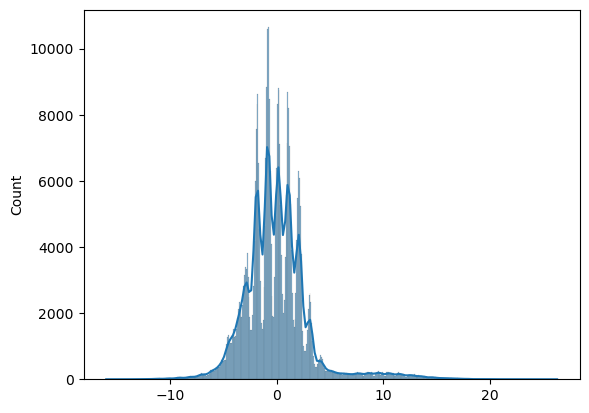

In [33]:
sns.histplot(residual, kde=True)

This is close to normal so the assumption of normality is satisfied. 

#### **Linearity of Variables**

Assumption is that there is a linear relation between X (independent variables) and y (dependent variable). 
<br>
To Check this we plot residual vs prediction value y hat. There shouldn't be any relation between the residual and the y hat. 

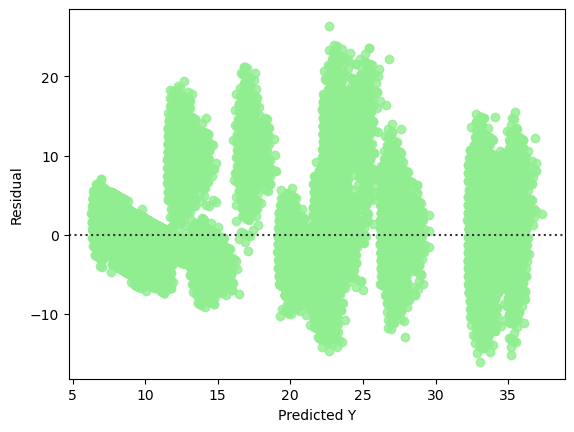

In [34]:
y_predic = ols_model2.predict(x_train2)

sns.residplot(x=y_predic, y=residual, color='lightgreen')
plt.xlabel('Predicted Y')
plt.ylabel('Residual')
plt.show()

No Pattern is observed here so the linearity is also satisfied. 

#### **Homoscedasticity**

In [35]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statitic', 'p-value']
test = sms.het_goldfeldquandt(residual, x_train2)
lzip(name, test)

[('F statitic', 1.0039106858288322), ('p-value', 0.19142132359756808)]

- P-value is 0.19 > 0.05 so it failes to reject the null hypothesis so the residuals are Homoscedastic.

<br>
<br>
All the assumption of the linear regresion are satisfied. 
<br>
The R-Squared is 0.84 so we can capture 84% of the variation in the data. 
<br>
The p-values for the independent variables are less than the 0.05 showing that there is statistically significant towards length of stay in the hospital. 


In [36]:
coef = ols_model2.params
coef

const                                    19.882991
Available Extra Rooms in Hospital         0.078613
Admission_Deposit                        -0.000038
Department_anesthesia                     6.082290
Department_gynecology                     0.461435
Department_radiotherapy                  -4.621785
Department_surgery                        9.684522
Ward_Facility_Code_B                      0.256348
Ward_Facility_Code_C                      0.435039
Ward_Facility_Code_D                      0.202650
Ward_Facility_Code_E                      0.308803
Ward_Facility_Code_F                      0.002437
doctor_name_Dr John                       7.260505
doctor_name_Dr Mark                       1.193884
doctor_name_Dr Nathan                    -0.216913
doctor_name_Dr Olivia                    -0.362561
doctor_name_Dr Sam                        1.282646
doctor_name_Dr Sarah                      0.824732
doctor_name_Dr Simon                      6.158436
doctor_name_Dr Sophia          

In [37]:
Equation = "Stay (in days)="

print (Equation, end='\t')
for i in range (len(coef)):
    print(f'({coef[i]}) * {coef.index[i]} +', end=' ')

Stay (in days)=	(19.882990782595797) * const + (0.07861348628829443) * Available Extra Rooms in Hospital + (-3.842950953444019e-05) * Admission_Deposit + (6.082290257915957) * Department_anesthesia + (0.46143468993714964) * Department_gynecology + (-4.621785263664599) * Department_radiotherapy + (9.684521739747716) * Department_surgery + (0.2563475580153335) * Ward_Facility_Code_B + (0.43503857862271633) * Ward_Facility_Code_C + (0.20265011441566483) * Ward_Facility_Code_D + (0.3088030119915572) * Ward_Facility_Code_E + (0.002437017506127903) * Ward_Facility_Code_F + (7.260505074609067) * doctor_name_Dr John + (1.1938837510407343) * doctor_name_Dr Mark + (-0.2169127817016808) * doctor_name_Dr Nathan + (-0.36256123211839075) * doctor_name_Dr Olivia + (1.2826455272581292) * doctor_name_Dr Sam + (0.8247318186154888) * doctor_name_Dr Sarah + (6.158436144640598) * doctor_name_Dr Simon + (0.21617688514172123) * doctor_name_Dr Sophia + (-12.737857469884856) * Age_11-20 + (-10.483086585841281)

- Number of days in the hosital decreases in Department of radiotherapy. 1 unit increase in department of radiotherapthy decrease stay by 4.6 times compare to the department of TB and chest which was reference here. 
- NUmber of days in hospital increase in Department of anesthesia. 1 unit increase in department of anestesia lead to increase in stay by ~6 times compare to the department of TB and Chest diseases which is reference here. 
- NUmber of days in hospital increase in Department of surgery. 1 unit increase in department of anestesia lead to increase in stay by ~9.6 times compare to the department of TB and Chest diseases which is reference here. 
- NUmber of days in hospital increase for patient of Dr john. 1 unit increase in dr john leads to increase in stay by ~7.2 times compare to dr Isaac which is reference here. 


Now that learn about the linear model, let's improve this model by doing regularizatin:

## **Regulaization**

#### **Ridge Regression**

In [38]:
# note if we are using linear regression model in scikit learn it will automatically  add the constant so you don't need to do that manually like you do in statsmodel. 
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

Ridge()

In [39]:
print('Perofrmance on Training data using Ridge Ruglarization technique:')
preformance_regression(ridge_model, x_train, y_train)

Perofrmance on Training data using Ridge Ruglarization technique:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.842813,0.842796,3.135092,2.146301,19.592776


In [40]:
print('Perofrmance on test data using Ridge Ruglarization technique:')
ridge_reg=  preformance_regression(ridge_model, x_test, y_test)
ridge_reg

Perofrmance on test data using Ridge Ruglarization technique:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.84303,0.842964,3.144039,2.155819,19.677875


The preformance is similar as the non regulaized model. 

#### **Ridge with Optimized alpha using Cross-validation**

In [41]:
# let adjust the alpha parameter:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10, 20]}
ridge_model_cv = GridSearchCV(estimator=Ridge(), param_grid=params,scoring='r2', cv=folds, return_train_score=True)
ridge_model_cv.fit(x_train, y_train), 

(GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
              estimator=Ridge(),
              param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                    20]},
              return_train_score=True, scoring='r2'),)

In [42]:
ridge_model_cv.best_params_

{'alpha': 0.1}

In [43]:
ridge_model_opt = Ridge(alpha=0.1)
ridge_model_opt.fit(x_train, y_train)

Ridge(alpha=0.1)

In [44]:
print('Perofrmance on Training data using optimized parameter for Ridge Ruglarization:')
preformance_regression(ridge_model_opt, x_train, y_train)

Perofrmance on Training data using optimized parameter for Ridge Ruglarization:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.842813,0.842796,3.135092,2.146246,19.591881


In [45]:
print('Perofrmance on test data using optimized parameter for Ridge Ruglarization technique:')
ridge_reg_opt= preformance_regression(ridge_model_opt, x_test, y_test)
ridge_reg_opt

Perofrmance on test data using optimized parameter for Ridge Ruglarization technique:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.84303,0.842964,3.144037,2.155765,19.676974


Even with the optimized parameter for alpha the Ridge regularization model doesn't improve the performance of the model. 

#### **Lasso Regularization**

In [46]:
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

In [47]:
print('Perofrmance on Training data using Lasso Ruglarization technique:')
preformance_regression(lasso_model, x_train, y_train)

Perofrmance on Training data using Lasso Ruglarization technique:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.417541,0.41748,6.034957,3.854067,34.456445


In [48]:
print('Perofrmance on Training data using Lasso Ruglarization technique:')
lasso_reg = preformance_regression(lasso_model, x_test, y_test)
lasso_reg

Perofrmance on Training data using Lasso Ruglarization technique:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.416006,0.41576,6.064339,3.873332,34.652716


The R-Squared droped sognificantly after performing the lasso model Let's try to find optimial value of alpha to see if it improves the preformance of the structure.

#### **Lasso with Optimized alpha using Cross-validation**

In [49]:
lasso_model_cv = GridSearchCV(estimator=Lasso(), param_grid=params, scoring='r2', cv=folds, return_train_score=True)
lasso_model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [50]:
lasso_model_cv.best_params_

{'alpha': 0.001}

In [51]:
lasso_model_opt = Lasso(alpha=0.001)
lasso_model_opt.fit(x_train, y_train)

Lasso(alpha=0.001)

In [52]:
print('Perofrmance on Training data using optimized parameter for Lasso Ruglarization:')
preformance_regression(lasso_model_opt, x_train, y_train)

Perofrmance on Training data using optimized parameter for Lasso Ruglarization:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.842785,0.842769,3.135364,2.147683,19.617859


In [53]:
print('Perofrmance on Test data using optimized parameter for Lasso Ruglarization:')
lasso_reg_opt =preformance_regression(lasso_model_opt, x_test, y_test)
lasso_reg_opt

Perofrmance on Test data using optimized parameter for Lasso Ruglarization:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.843002,0.842936,3.144315,2.157198,19.70296


Using Lasso Regularization model with optimized alpha didn't improve the linear regression model. 

#### **Elastic Net Regularization**

In [54]:
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
elasticnet_model.fit(x_train, y_train)

ElasticNet()

In [55]:
print('Perofrmance on Training data using Elastic Net Ruglarization:')
preformance_regression(elasticnet_model, x_train, y_train)

Perofrmance on Training data using Elastic Net Ruglarization:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.31742,0.317348,6.533087,4.662022,39.990694


In [56]:
print('Perofrmance on Test data using Elastic Net Ruglarization:')
elasticnet_reg = preformance_regression(elasticnet_model, x_test, y_test)
elasticnet_reg

Perofrmance on Test data using Elastic Net Ruglarization:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.317455,0.317168,6.556087,4.678504,40.121657


The results is very poor compare to the linear regression model. So let's now optimized the parameters. 

#### **Lasso with Optimized alpha and L1-ratio using Cross-validation**

In [57]:
params = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
          'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]}

elasticnet_model_cv = GridSearchCV(estimator=ElasticNet(), param_grid=params, cv=folds, scoring='r2', return_train_score=True)
elasticnet_model_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
                         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]},
             return_train_score=True, scoring='r2')

In [58]:
elasticnet_model_cv.best_params_

{'alpha': 0.001, 'l1_ratio': 0.05}

In [59]:
elasticnet_model_opt = ElasticNet(alpha=0.001, l1_ratio=0.05)
elasticnet_model_opt.fit(x_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.05)

In [60]:
print('Perofrmance on Training data using optimized parameters for Elastic Net Ruglarization:')
preformance_regression(elasticnet_model_opt, x_train, y_train)

Perofrmance on Training data using optimized parameters for Elastic Net Ruglarization:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.841463,0.841446,3.148523,2.169552,19.894454


In [61]:
print('Perofrmance on Test data using optimized parameters for Elastic Net Ruglarization:')
elasticnet_reg_opt = preformance_regression(elasticnet_model_opt, x_test, y_test)
elasticnet_reg_opt

Perofrmance on Test data using optimized parameters for Elastic Net Ruglarization:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.841685,0.841618,3.157481,2.178912,19.981591


The results of the optimized parameter is the same as linear regession and Elastic Net Reg. also couldn't improve the performance of the model. 

In [62]:
models= pd.concat([linear_reg,ridge_reg,  ridge_reg_opt,lasso_reg, lasso_reg_opt, elasticnet_reg,
                   elasticnet_reg_opt], axis=0) #combining all models into a single dataframe
models['Models'] = ['Least Squares', 'Ridge Regression', 'Ridge Regression optimized', 'Lasso Regression',
                                      'Lasso Regression Optimized', 'Elastic Net Regression',
                    'Elastic Net Regression Optimized'] #adding names of the models as a column to the dataframe
models = models.iloc[:,[5, 0,1,2,3,4]] #ordering names of the models as the first column
models

,Models,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,Least Squares,0.843030,0.842967,3.144035,2.155757,19.676878
0,Ridge Regression,0.843030,0.842964,3.144039,2.155819,19.677875
0,Ridge Regression optimized,0.843030,0.842964,3.144037,2.155765,19.676974
0,Lasso Regression,0.416006,0.415760,6.064339,3.873332,34.652716
0,Lasso Regression Optimized,0.843002,0.842936,3.144315,2.157198,19.702960
0,Elastic Net Regression,0.317455,0.317168,6.556087,4.678504,40.121657
0,Elastic Net Regression Optimized,0.841685,0.841618,3.157481,2.178912,19.981591


- The Least Squares Method providing best results out of all of these models. 
- Regularization didn't help that much. 
- Next we will run nonlinear models to see if we can improve the performance of our model.

## **Froward Feature Selection** 

In [63]:
reg = LinearRegression()
sfs = SFS(reg,
          k_features = x_train.shape[1],
          forward =True,
          floating = False,
          verbose = 2, 
          scoring = 'r2',
          cv=5,
          n_jobs = 1 
          )
sfs_data = sfs.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    9.5s

[2024-03-29 15:11:10] Features: 1/42 -- score: 0.49188988610314477[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   16.8s

[2024-03-29 15:11:27] Features: 2/42 -- score: 0.6046160397618374[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   18.7s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   18.7s

[2024-03-29 15:11:46] Features: 3/42 -- score: 0.6461909142668072
[2024-03-29 15:12:05] Features: 4/42 -- score: 0.7013054914238058
[2024-03-29 15:12:28] Features: 5/42 -- score: 0.7323069421611194
[2024-03-29 15:12:52] Features: 6/42 -- score: 0.8191351388509398
[2024-03-29 15:13:17] Features: 7/42 -- score: 0.8303282862064949
[2024-03-29 15:13:44] Features: 8/42 -- score: 0.8395075505200165
[2024-03-29 15:14:17] Features: 9/42 -- score: 0.8406253593745727
[2024-03-29 15:14:51] Features: 10/42 -- score: 0.8414600432551442
[2024-03-29 15:15:25] Features: 11/42 -- score: 0.8422172722438954
[2024-03-29 15:16:00] Feat

In [64]:
sfs.get_metric_dict()

{1: {'feature_idx': (5,),
  'cv_scores': array([0.48930483, 0.48939957, 0.49302582, 0.48922331, 0.4984959 ]),
  'avg_score': 0.49188988610314477,
  'feature_names': ('Department_gynecology',),
  'ci_bound': 0.004631493101657573,
  'std_dev': 0.003603458980132605,
  'std_err': 0.0018017294900663024},
 2: {'feature_idx': (5, 6),
  'cv_scores': array([0.60393142, 0.60360277, 0.60160635, 0.60347042, 0.61046924]),
  'avg_score': 0.6046160397618374,
  'feature_names': ('Department_gynecology', 'Department_radiotherapy'),
  'ci_bound': 0.0039038189052625996,
  'std_dev': 0.0030373037338532133,
  'std_err': 0.0015186518669266067},
 3: {'feature_idx': (5, 6, 23),
  'cv_scores': array([0.64519204, 0.6466788 , 0.64365579, 0.64406087, 0.65136707]),
  'avg_score': 0.6461909142668072,
  'feature_names': ('Department_gynecology',
   'Department_radiotherapy',
   'Age_31-40'),
  'ci_bound': 0.003589267960519947,
  'std_dev': 0.002792572412514001,
  'std_err': 0.0013962862062570005},
 4: {'feature_idx'

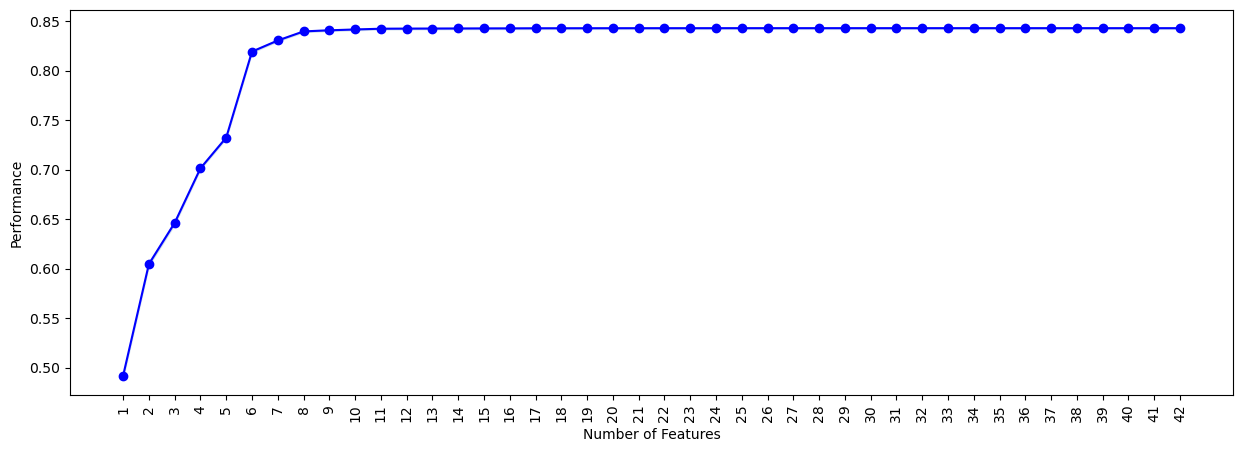

In [65]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize = (15,5))
plt.xticks(rotation = 90 )
plt.show()

Based on this plot the perforamnce doesn't improve after increasing the number of features from 8. <br>
The 8 seems to be the right number to decrease the dimensionality of the model and increase the modeling time. 

In [66]:
sfs_opt = SFS(reg,
          k_features = 8,
          forward =True,
          floating = False,
          verbose = 2, 
          scoring = 'r2',
          cv=5,
          n_jobs = 1 
          )
sfs_data_opt = sfs_opt.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    5.9s

[2024-03-29 15:30:15] Features: 1/8 -- score: 0.49188988610314477[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   11.9s

[2024-03-29 15:30:27] Features: 2/8 -- score: 0.6046160397618374[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   14.4s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   14.4s

[2024-03-29 15:30:42] Features: 3/8 -- score: 0.6461909142668072
[2024-03-29 15:30:57] Features: 4/8 -- score: 0.7013054914238058
[2024-03-29 15:31:16] Features: 5/8 -- score: 0.7323069421611194
[2024-03-29 15:31:35] Features: 6/8 -- score: 0.8191351388509398
[2024-03-29 15:31:55] Features: 7/8 -- score: 0.8303282862064949
[2024-03-29 15:32:17] Features: 8/8 -- score: 0.8395075505200165

In [67]:
# get all the columns that are important: 
feature_col = list(sfs_data_opt.k_feature_idx_)
feature_col

[4, 5, 6, 7, 21, 22, 23, 24]

In [68]:
x_train.columns[feature_col]

Index(['Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'Age_11-20',
       'Age_21-30', 'Age_31-40', 'Age_41-50'],
      dtype='object')

In [69]:
x_train_feat = x_train[x_train.columns[feature_col]]
x_test_feat = x_test[x_train_feat.columns]
                       

In [70]:
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_feat, y_train)

LinearRegression()

In [71]:
print('Perofrmance on Training data using Feature Selection data:')
preformance_regression(lin_reg_model2, x_train_feat, y_train)

Perofrmance on Training data using Feature Selection data:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.83952,0.839516,3.167762,2.16747,19.769004


In [72]:
print('Perofrmance on Test data using Feature Selection data:')
linear_mod_fea = preformance_regression(lin_reg_model2, x_test_feat, y_test)
linear_mod_fea

Perofrmance on Test data using Feature Selection data:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.839871,0.839858,3.175516,2.174951,19.83425


In [73]:
models_train_comp_df = pd.concat([
    linear_reg.T, linear_mod_fea.T] , axis=1
)

models_train_comp_df.columns = ["Linear Regression Model", "Linear Regression Model (FS Features)",]
print("Performance Comparsion:")
models_train_comp_df

Performance Comparsion:


,Linear Regression Model,Linear Regression Model (FS Features)
R-Squared,0.843030,0.839871
Adj. R-Squared,0.842967,0.839858
RMSE,3.144035,3.175516
MAE,2.155757,2.174951
MAPE,19.676878,19.834250


- The number of features reduced to 8 from 42 features. which is almsot 81% reduction. 
- The perforamnce of the model with reduce features is very close to the performance of model with 42 features. 
- So if time is important for us we can reudce the number of features to 8 without lossing much of the performance of the model. 

## **DecisionTree Regression**

In [74]:
decisionTree_model = DecisionTreeRegressor(random_state=1)
decisionTree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [75]:
print('Performance of Training data using Decision Tree model')
preformance_regression(decisionTree_model, x_train, y_train)

Performance of Training data using Decision Tree model


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,1.0,1.0,0.0,0.0,0.0


In [76]:
print('Performance of Test data using Decision Tree model')
deci_pre = preformance_regression(decisionTree_model, x_test, y_test)
deci_pre

Performance of Test data using Decision Tree model


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.94768,0.947658,1.81515,1.12829,9.341248


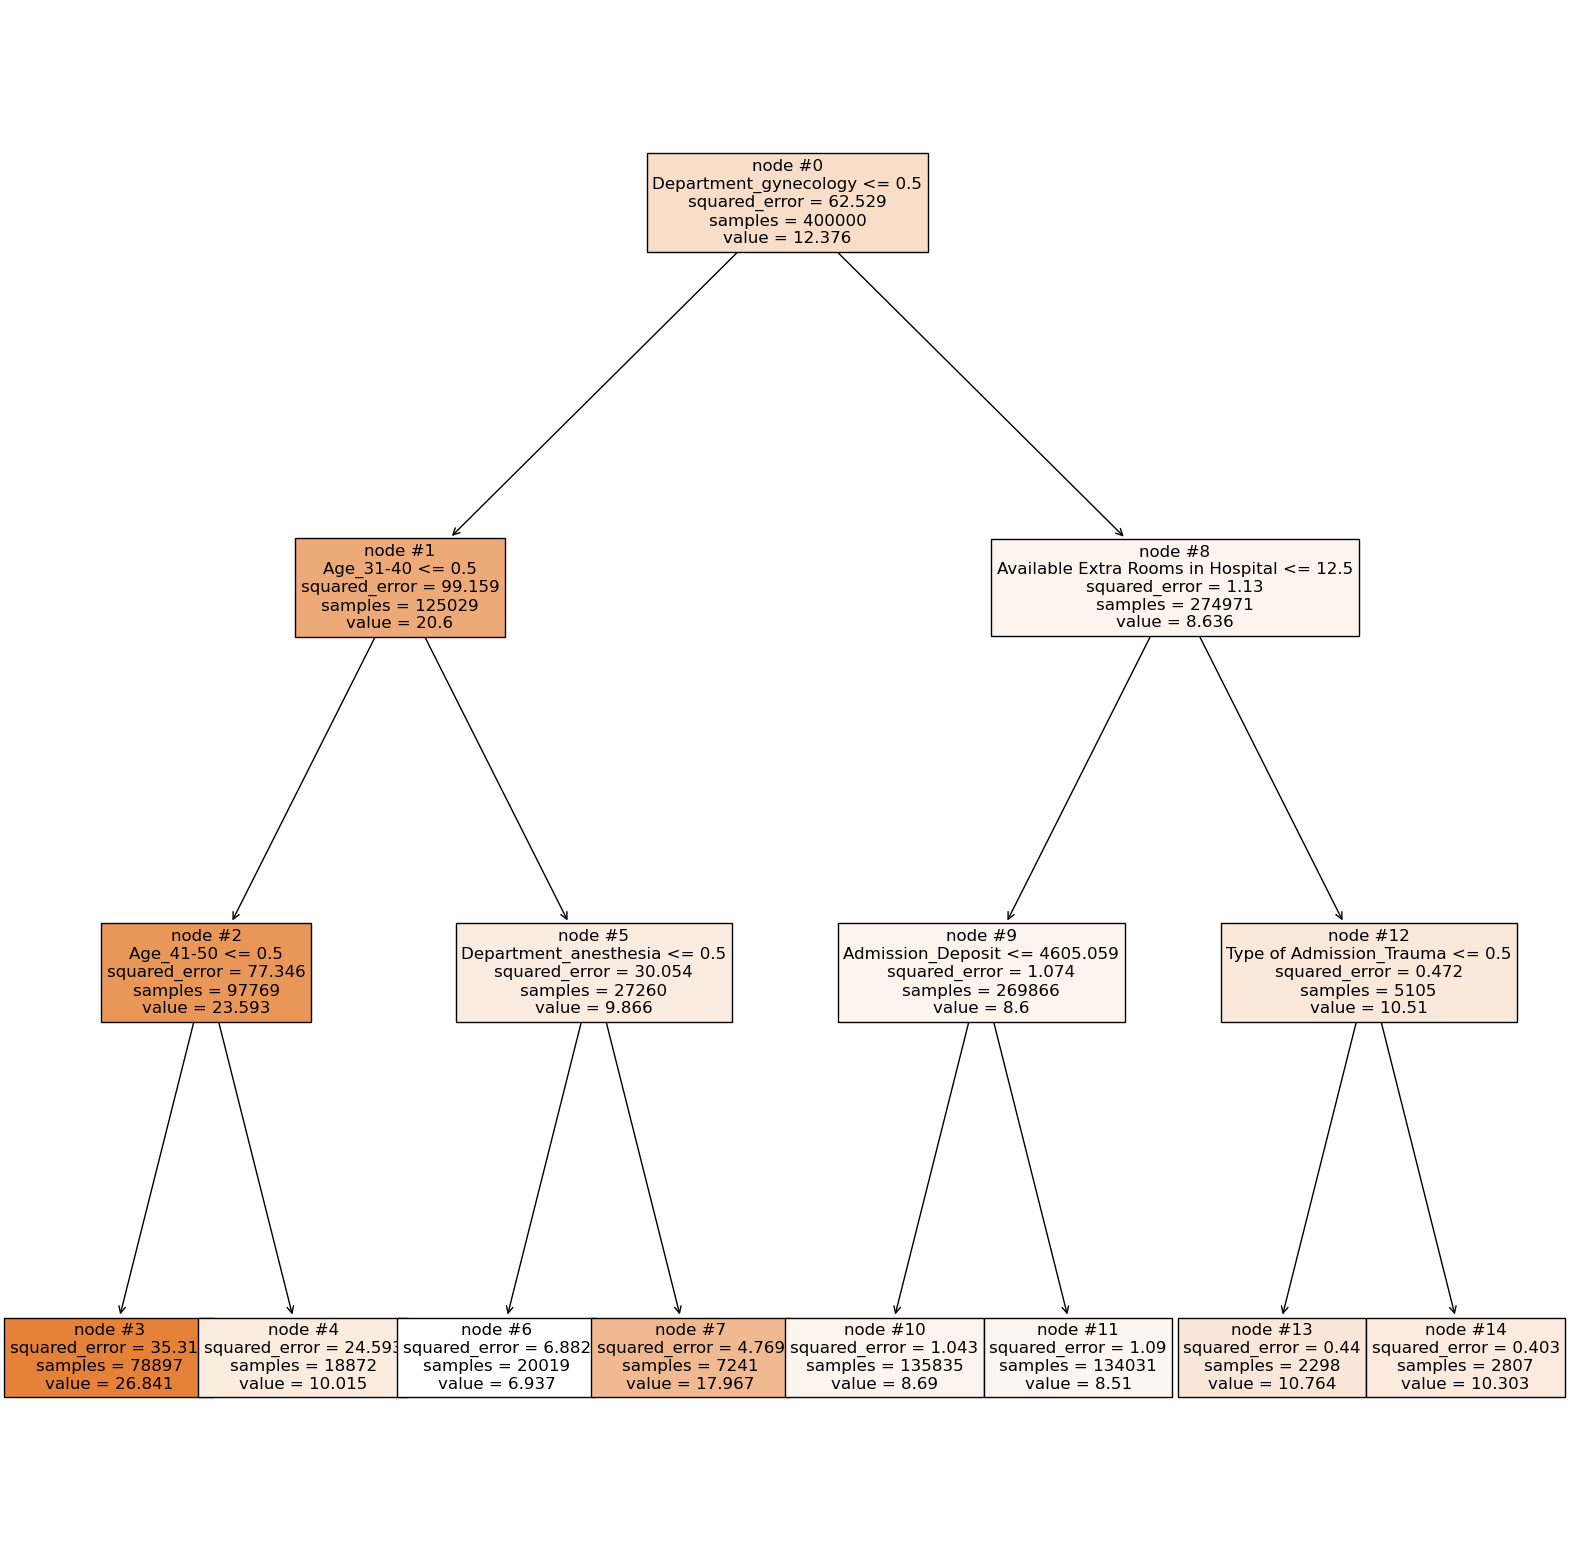

In [77]:
from sklearn import tree
features = list(x.columns)

decisionTree_model_visual = DecisionTreeRegressor(random_state=1, max_depth=3)

decisionTree_model_visual.fit(x_train, y_train)

plt.figure(figsize=(20,20))
tree.plot_tree(decisionTree_model_visual, feature_names=features,
               filled= True, fontsize=12, node_ids=True, class_names= True)

plt.show()

In [78]:
print(tree.export_text(decisionTree_model_visual, feature_names=features, 
                       show_weights=True))

|--- Department_gynecology <= 0.50
|   |--- Age_31-40 <= 0.50
|   |   |--- Age_41-50 <= 0.50
|   |   |   |--- value: [26.84]
|   |   |--- Age_41-50 >  0.50
|   |   |   |--- value: [10.02]
|   |--- Age_31-40 >  0.50
|   |   |--- Department_anesthesia <= 0.50
|   |   |   |--- value: [6.94]
|   |   |--- Department_anesthesia >  0.50
|   |   |   |--- value: [17.97]
|--- Department_gynecology >  0.50
|   |--- Available Extra Rooms in Hospital <= 12.50
|   |   |--- Admission_Deposit <= 4605.06
|   |   |   |--- value: [8.69]
|   |   |--- Admission_Deposit >  4605.06
|   |   |   |--- value: [8.51]
|   |--- Available Extra Rooms in Hospital >  12.50
|   |   |--- Type of Admission_Trauma <= 0.50
|   |   |   |--- value: [10.76]
|   |   |--- Type of Admission_Trauma >  0.50
|   |   |   |--- value: [10.30]



- **Root Node** is Department of Gynecology. This feature provides the highest information gain. if this value is less than 0.5 the left side of the branch is taken and if it is higher than 0.5 the right side of the brank is taken. 

- **Internal Nodes:** <br>
    - Age 31-40 <= 0.5
    - Age 41-50 <= 0.5
    - Dempartment of Anesthesia <= 0.5
    - Available Extra Room in Hospital <= 0.5
    - Admission_Deposite <= 0.5 
    - Type of Admission_Trume <= 0.5

- **Leaf Nodes:** Nodes with no child. This nodes represent final desicions. 

- **Interpolation of the Tree** 
    - If the patient was not admitted to Gynocology Dept. and is in age of 31-40 and not admitted to Anesthesia department then the predicted number of days stay is ~7 days. 
    - If the patient was not admitted to Gynocology Dept and is not is 31-50 years old then the predicted length of stay is ~27 days. 
    - If the patient is admitted to Gynocology Dept. and avialivle extra rooms in hospital was less than 12.5 and paid admission_deposite of less than ~4605 then the predicted # of stays is ~9days 
    - If the patient is admitted in Gynocology Dept. and the available rooms are more than 12.5 and the reason for admission was Truma then the predication is that the patient is going to stay in hospital for ~11 days. 


## **Bagging Regression**

In [79]:
bagginig_model = BaggingRegressor(random_state=1)
bagginig_model.fit(x_train, y_train)

BaggingRegressor(random_state=1)

In [80]:
print('Performance of Training data using Bagging model (booststrap + aggregation):')
preformance_regression(bagginig_model, x_train, y_train)

Performance of Training data using Bagging model (booststrap + aggregation):


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.994616,0.994616,0.58021,0.357521,3.011297


In [81]:
print('Performance of Test data using Bagging model (booststrap + aggregation):')
bag_pref = preformance_regression(bagginig_model, x_test, y_test)
bag_pref

Performance of Test data using Bagging model (booststrap + aggregation):


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.970242,0.970229,1.36894,0.905205,7.648842


## **Random Forest**

In [82]:
randomForset_model = RandomForestRegressor(random_state=1, n_estimators=100)
randomForset_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [83]:
print('Performance of Training data using Random Forest model:')
preformance_regression(randomForset_model, x_train, y_train)

Performance of Training data using Random Forest model:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.996195,0.996195,0.487743,0.321099,2.71949


In [84]:
print('Performance of Test data using Random Forest model:')
rf_perf = preformance_regression(randomForset_model, x_test, y_test)
rf_perf

Performance of Test data using Random Forest model:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.973011,0.973,1.303684,0.86505,7.314995


## **AdaBoost**

In [85]:
from sklearn.ensemble import AdaBoostRegressor

adaoost_model = AdaBoostRegressor(random_state=1)
adaoost_model.fit(x_train, y_train)


AdaBoostRegressor(random_state=1)

In [86]:
print('Performance of Training data using Ababoost Ensemble model:')
preformance_regression(adaoost_model, x_train, y_train)

Performance of Training data using Ababoost Ensemble model:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.911219,0.911209,2.356146,1.57734,13.542241


In [87]:
print('Performance of Test data using Ababoost Ensemble model:')
adaboost_pef = preformance_regression(adaoost_model, x_test, y_test)
adaboost_pef

Performance of Test data using Ababoost Ensemble model:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.910399,0.910362,2.375388,1.58689,13.623722


## **Gradient Boosting**

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

gradientboost_model = GradientBoostingRegressor(random_state=1)
gradientboost_model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=1)

In [89]:
print('Performance of Training data using Gradient Boost Ensemble model:')
preformance_regression(gradientboost_model, x_train, y_train)


Performance of Training data using Gradient Boost Ensemble model:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.949002,0.948997,1.785738,1.209422,10.227195


In [90]:
print('Performance of Test data using Gradient Boost Ensemble model:')
gradientboost_pef = preformance_regression(gradientboost_model, x_test, y_test)
gradientboost_pef

Performance of Test data using Gradient Boost Ensemble model:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.948965,0.948944,1.792721,1.212749,10.247284


## **XGBoost**

In [91]:
# !pip install xgboost 

In [92]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state = 1)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [93]:
print('Performance of Training data using XGBoost Ensemble model:')
preformance_regression(xgb_model, x_train, y_train)


Performance of Training data using XGBoost Ensemble model:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.965873,0.96587,1.460797,1.006208,8.698396


In [94]:
print('Performance of Test data using XGBoost Ensemble model:')
xgb_pef = preformance_regression(xgb_model, x_test, y_test)
xgb_pef

Performance of Test data using XGBoost Ensemble model:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.963925,0.96391,1.507244,1.029209,8.825108


## **Model Performances**

In [95]:
models_test_comp_df = pd.concat([
    linear_reg.T, deci_pre.T, bag_pref.T, rf_perf.T,
    adaboost_pef.T, gradientboost_pef.T, xgb_pef.T
], axis=1)

models_test_comp_df.columns = [
    'Linear Regression', 
    'Decision Tree Regression', 
    'Bagging Regression',
    'Random Forest Regression',
    'AdaBoost Regression',
    'Gradient Boosting Regression',
    'XGBoost Regression'
]

print("Test Performance Comparison:")
models_test_comp_df.T

Test Performance Comparison:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
Linear Regression,0.843030,0.842967,3.144035,2.155757,19.676878
Decision Tree Regression,0.947680,0.947658,1.815150,1.128290,9.341248
Bagging Regression,0.970242,0.970229,1.368940,0.905205,7.648842
Random Forest Regression,0.973011,0.973000,1.303684,0.865050,7.314995
AdaBoost Regression,0.910399,0.910362,2.375388,1.586890,13.623722
Gradient Boosting Regression,0.948965,0.948944,1.792721,1.212749,10.247284
XGBoost Regression,0.963925,0.963910,1.507244,1.029209,8.825108


- All the Nonlinear models perform better than the linear models. Random Forst provides the best R-Squared and preformance.
- It has the lowesr RMSE, MAE and MAPE showing that the error is very small in this model. 
- The model doesn't overfit and it is less complex than bossting method such as XGBoost 
- The model was slow but here we priotries performance over runtime
- So Random Forst is the model that we choose but let's see if can import the performance of Radom Forst by changing the hyperparameters. 

#### **Tune Hyperparameters**

Random Forst has these parameters to tune: <br> 
    1. n_estimator <br>
    2. max_features <br>
    3. max_depth <br>

In [96]:
rf_model_tune = RandomForestRegressor(random_state=1)
rf_parameters = {
    'n_estimators' : [100, 110, 120], 
    'max_depth': [5, 7, None],
    'max_features': [0.8, 1]
}

rf_grid_tune = GridSearchCV(estimator=rf_model_tune, param_grid=rf_parameters, cv=5, scoring='neg_mean_squared_error')
rf_grid_tune = rf_grid_tune.fit(x_train, y_train)

rf_grid_tun_opt =rf_grid_tune.best_estimator_
rf_grid_tun_opt.fit(x_train, y_train)


RandomForestRegressor(max_features=0.8, n_estimators=120, random_state=1)

In [102]:
print('Performance of Training data using Random Forst model with optimized hyperparameters:')
preformance_regression(rf_grid_tun_opt, x_train, y_train)


Performance of Training data using Random Forst model with optimized hyperparameters:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.99626,0.99626,0.483559,0.318969,2.700475


In [98]:
print('Performance of Test data using Random Forst model with optimized hyperparameters:')
rf_opt_perf = preformance_regression(rf_grid_tun_opt, x_test, y_test)
rf_opt_perf

Performance of Test data using Random Forst model with optimized hyperparameters:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.973309,0.973297,1.296477,0.860635,7.277295


In [99]:
models_test_comp_df = pd.concat([
    linear_reg.T, deci_pre.T, bag_pref.T, rf_perf.T,
    adaboost_pef.T, gradientboost_pef.T, xgb_pef.T, rf_opt_perf.T
], axis=1)

models_test_comp_df.columns = [
    'Linear Regression', 
    'Decision Tree Regression', 
    'Bagging Regression',
    'Random Forest Regression',
    'AdaBoost Regression',
    'Gradient Boosting Regression',
    'XGBoost Regression', 
    'Random Forest Optimized Hyperparameter'
]

print("Test Performance Comparison:")
models_test_comp_df.T

Test Performance Comparison:


,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
Linear Regression,0.843030,0.842967,3.144035,2.155757,19.676878
Decision Tree Regression,0.947680,0.947658,1.815150,1.128290,9.341248
Bagging Regression,0.970242,0.970229,1.368940,0.905205,7.648842
Random Forest Regression,0.973011,0.973000,1.303684,0.865050,7.314995
AdaBoost Regression,0.910399,0.910362,2.375388,1.586890,13.623722
Gradient Boosting Regression,0.948965,0.948944,1.792721,1.212749,10.247284
XGBoost Regression,0.963925,0.963910,1.507244,1.029209,8.825108
Random Forest Optimized Hyperparameter,0.973309,0.973297,1.296477,0.860635,7.277295


- Random Forst with Tuned hyperparameter slightly improved the performance. So we will chose this model at the end. 

## **Visualizing The Feature Importance**

In [100]:
rf_grid_tun_opt.feature_importances_

array([6.09982429e-03, 4.27245899e-03, 4.25324721e-03, 2.23749257e-02,
       9.65762057e-02, 4.29023285e-01, 6.59030370e-02, 9.34720961e-03,
       1.90483022e-04, 6.83290350e-04, 2.17459505e-04, 9.59747839e-04,
       2.81331579e-04, 6.48803355e-04, 3.16945122e-03, 1.12775909e-04,
       8.26871057e-05, 2.14146547e-03, 1.30987279e-04, 3.27990579e-04,
       1.05778979e-04, 1.17878831e-04, 8.12148028e-04, 1.62505014e-01,
       1.65294826e-01, 1.16030075e-03, 2.30928719e-03, 7.42869503e-04,
       3.77386427e-04, 1.17181501e-04, 1.06722255e-02, 4.20170467e-04,
       1.37853592e-03, 7.50985961e-04, 1.11213012e-03, 1.17819602e-03,
       6.23711280e-04, 4.61478124e-04, 6.79272895e-04, 7.98925099e-04,
       7.18409624e-04, 8.66620779e-04])

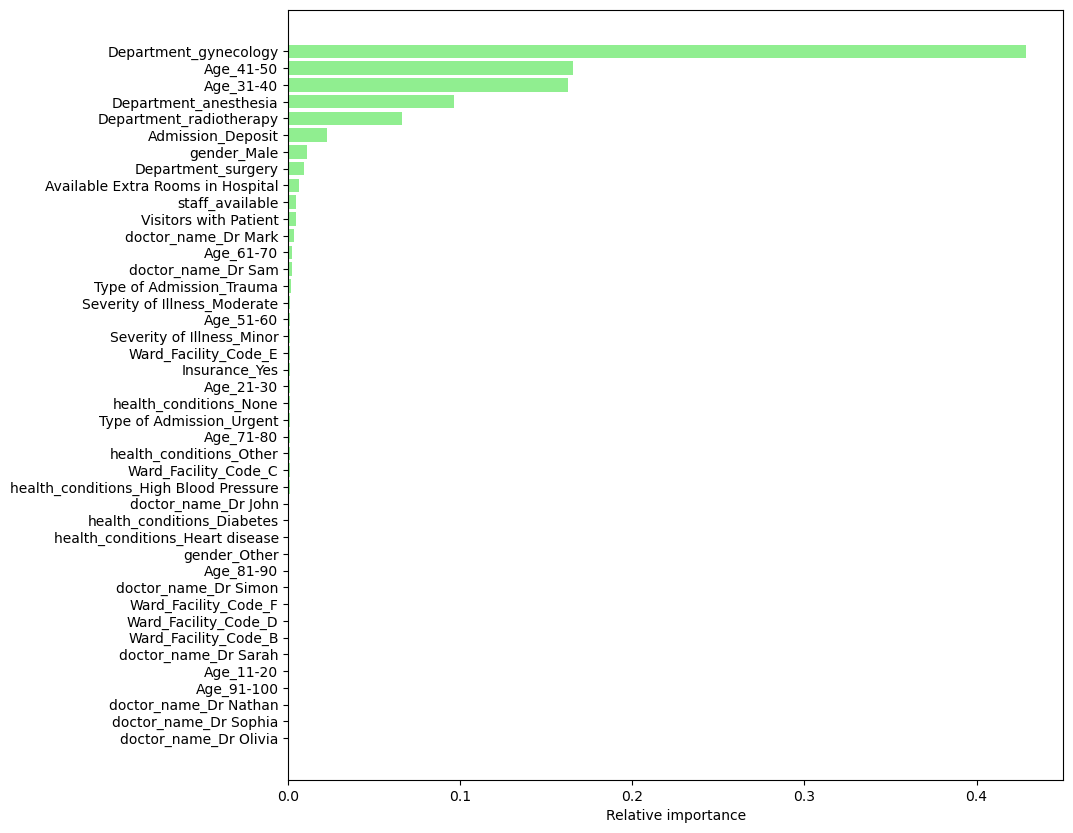

In [103]:
features = list(x.columns)

feature_imporance = rf_grid_tun_opt.feature_importances_

index = np.argsort(feature_imporance)

plt.figure(figsize=(10,10))
plt.barh(range(len(index)), feature_imporance[index], color = 'lightgreen')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative importance')
plt.show()

- As we observed in the decision tree algorithm as well Department of Gynocology have the highest information gain in determining the Salary. Following by age range of 31-50, Departments of Anesthesia adn Radiotherapy and adminsion deposite. 
- Lot's of variable here has no influence in the number of staying days. 

## **Recommendations**

- Department of Gynecology is the busiest department, handel 68% of the cases in this hospital. This department needs to be well staffed. 
- 80% of the cases are Truma and Emergency, so increase in ambulances and emergency room is improtant. 
- Pateints in the age of 1-10 and 50-100 are the ones that stay in the hospital the longest so extra attention is needed to assure well resourced for these age range to help expedit discharge. 
- The Random Forst algorithm predict the days of stay with just 1 day error. We can use this model to predict length of stay of new patient and allocate resources accordingly. 

## **Serialization**

#### **Pickle**

In [104]:
import pickle
with open('RF_tuned.pkl', 'wb') as file: 
    pickle.dump(rf_grid_tun_opt, file)

In [105]:
with open('RF_tuned.pkl', 'rb') as file: 
    loaded_model_pickle = pickle.load(file)

##### **Joblib**

In [106]:
import joblib
joblib.dump(rf_grid_tun_opt,'RF_tuned.joblib')

['RF_tuned.joblib']

In [107]:
loaded_model_joblib = joblib.load('RF_tuned.joblib')